# Exercises

In [154]:
# imports
import pandas as pd
import numpy as np
import os
from scipy import stats
# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")
# acquire
from env import host, user, password
from pydataset import data
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# docs
import acquire
import prepare
import explore
import prepare2

from io import StringIO

import graphviz
from graphviz import Graph

In [155]:
# positive: passenger survives
# negative: passenger dies
# TP: predict survival, and the passenger actually survived
# TN: predict death, and passenger actually died
# FN: predict death, but passenger actually survived
# FP: predict survival, but passenger actually died

In [156]:
# 1. What is your baseline prediction? What is your baseline accuracy? 
# remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
# When you make those predictions, what is your accuracy? This is your baseline accuracy.
#Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

train, validate, test = prepare2.prep_titanic_data(acquire.get_titanic_data(), column = 'age', method = 'median', dummies = ['embarked', 'sex'])

In [157]:
train.shape, validate.shape, test.shape # looking at shape for each dataset

((498, 12), (214, 12), (179, 12))

In [158]:
#Getting ready to test models
X_train, y_train = train.drop(columns='survived'), train.survived
X_validate, y_validate = validate.drop(columns='survived'), validate.survived
X_test, y_test = test.drop(columns='survived'), test.survived

In [159]:
train['survived'].value_counts() #Looking at most common value

0    307
1    191
Name: survived, dtype: int64

In [160]:
# baseline prediction = 0 (everyone dies)

# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
# how does it do on training data set?
print('Training accuracy: %.4f' % baseline.score(X_train, y_train))


Training accuracy: 0.6165


In [161]:
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,class,alone,embarked_Q,embarked_S,sex_male
583,583,0,1,36.0,0,0,40.1250,First,1,0,0,1
165,165,1,3,9.0,0,2,20.5250,Third,0,0,1,1
50,50,0,3,7.0,4,1,39.6875,Third,0,0,1,1
259,259,1,2,50.0,0,1,26.0000,Second,0,0,1,0
306,306,1,1,28.0,0,0,110.8833,First,1,0,0,0


In [162]:
#2 Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [163]:
X_cols = ['pclass', 'alone', 'embarked_Q', 'embarked_S', 'sex_male']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [164]:
#Can drop columns instead of calling specific columns like above, commented out so won't run

# train.drop(columns = 'class', inplace=True)
# validate.drop(columns = 'class', inplace=True)
# test.drop(columns = 'class', inplace=True)

In [165]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [166]:
#Model 1 score
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

training score: 81.93%
validate score: 79.44%


In [167]:
train['prediction'] = tree.predict(X_train) # prediction

In [168]:
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,class,alone,embarked_Q,embarked_S,sex_male,prediction
583,583,0,1,36.0,0,0,40.1250,First,1,0,0,1,0
165,165,1,3,9.0,0,2,20.5250,Third,0,0,1,1,0
50,50,0,3,7.0,4,1,39.6875,Third,0,0,1,1,0
259,259,1,2,50.0,0,1,26.0000,Second,0,0,1,0,1
306,306,1,1,28.0,0,0,110.8833,First,1,0,0,0,1


[Text(306.90000000000003, 454.2942857142857, 'X[4] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(166.7934782608696, 384.40285714285716, 'X[0] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(73.38913043478261, 314.51142857142855, 'X[3] <= 0.5\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(26.686956521739134, 244.62, 'X[1] <= 0.5\ngini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(13.343478260869567, 174.7285714285714, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(40.0304347826087, 174.7285714285714, 'X[0] <= 1.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(26.686956521739134, 104.83714285714285, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(53.37391304347827, 104.83714285714285, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(120.09130434782611, 244.62, 'X[1] <= 0.5\ngini = 0.095\nsamples = 60\nvalue = [3, 57]'),
 Text(93.40434782608696, 174.7285714285714, 'X[0] <= 1.5\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 T

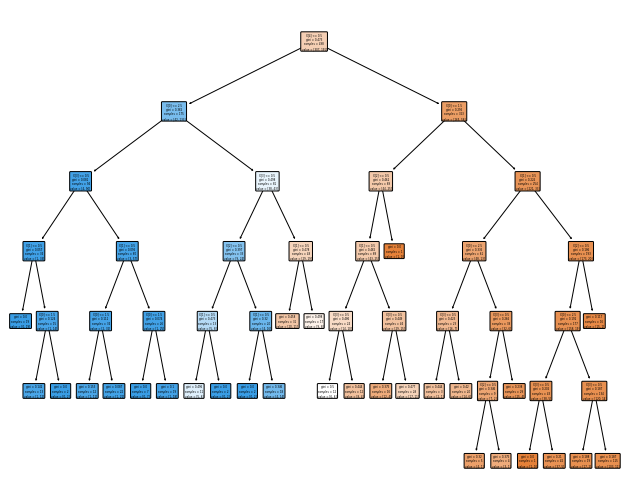

In [170]:
#visualize it
plot_tree(tree, filled=True, rounded=True)

In [53]:
#adding parameters to model above
tree2 = DecisionTreeClassifier(max_features=4)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_features=4)

In [54]:
#Model 2 score
print(f'training score: {tree2.score(X_train, y_train):.2%}')
print(f'validate score: {tree2.score(X_validate, y_validate):.2%}')

training score: 81.93%
validate score: 79.44%


In [ ]:
#3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [55]:
#Model 1 score
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

training score: 81.93%
validate score: 79.44%


In [56]:
train.prediction.value_counts() # looking at unique values for prediction

0    371
1    127
Name: prediction, dtype: int64

In [64]:
train.survived.value_counts() # looking at unique values for survived

0    307
1    191
Name: survived, dtype: int64

In [65]:
confusion_matrix(train.survived, train.prediction) #Looking at confusion matrix

array([[294,  13],
       [ 77, 114]])

Note: Confusion Matrix
- train.survived= row totals
- train.prediction= column totals

In [66]:
#Putting confusion matrix into dataframe
pd.DataFrame(confusion_matrix(train.survived, train.prediction), index=['actual death', 'actual survived'], columns=['pred death', 'pred survived'] )

,pred death,pred survived
actual death,294,13
actual survived,77,114


In [76]:
#Classification report
classification = pd.DataFrame(classification_report(train.survived, train.prediction, output_dict= True))

In [77]:
classification

,0,1,accuracy,macro avg,weighted avg
precision,0.792453,0.897638,0.819277,0.845045,0.832795
recall,0.957655,0.596859,0.819277,0.777257,0.819277
f1-score,0.867257,0.716981,0.819277,0.792119,0.809621
support,307.000000,191.000000,0.819277,498.000000,498.000000


Note: 1 is survived and 0 is not survived

In [78]:
#4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
#Classification report

In [ ]:
# positive: passenger survives
# negative: passenger dies
# TP: predict survival, and the passenger actually survived
# TN: predict death, and passenger actually died
# FN: predict death, but passenger actually survived
# FP: predict survival, but passenger actually died

In [89]:
classification = pd.DataFrame(classification_report(train.survived, train.prediction, output_dict= True))

In [90]:
classification

,0,1,accuracy,macro avg,weighted avg
precision,0.792453,0.897638,0.819277,0.845045,0.832795
recall,0.957655,0.596859,0.819277,0.777257,0.819277
f1-score,0.867257,0.716981,0.819277,0.792119,0.809621
support,307.000000,191.000000,0.819277,498.000000,498.000000


In [91]:
classification= classification.rename(columns={'0': "dead", '1': "survived"})

In [92]:
classification #Verifying column renamed were changed

,dead,survived,accuracy,macro avg,weighted avg
precision,0.792453,0.897638,0.819277,0.845045,0.832795
recall,0.957655,0.596859,0.819277,0.777257,0.819277
f1-score,0.867257,0.716981,0.819277,0.792119,0.809621
support,307.000000,191.000000,0.819277,498.000000,498.000000


In [93]:
TN= 294
FN= 77
FP= 13
TP= 114

tpr = TP/(TP+FN)
fpr = FP/(FP+TN)
tnr = TN/(TN+FP)
fnr = FN/(FN+TP)

In [94]:
#True positive rate
tpr

0.5968586387434555

In [83]:
#False positive rate
fpr

0.04234527687296417

In [84]:
# True negative rate
tnr

0.9576547231270358

In [85]:
# False negative rate
fnr

0.4031413612565445

In [ ]:
# positive: passenger survives
# negative: passenger dies
# TP: predict survival, and the passenger actually survived
# TN: predict death, and passenger actually died
# FN: predict death, but passenger actually survived
# FP: predict survival, but passenger actually died

In [102]:
#5. Run through steps 2-4 using a different max_depth value.
def run_metrics(model, data_set):
    """
    This function takes in a model and ouputs metrics. 
    model = name of class model
    data_set = train, validate, test (AS A STRING)
    Will output the Precision Score, the classification report, and the confusion matrix
    It is advisable to print the name of the model you're working with before hand for clarity
    i.e. print('Metrics for Model 1 with Train data\n')
    """
    if data_set == 'train':
        X = X_train
        y = y_train
        df = train
    if data_set == 'validate':
        X = X_validate
        y = y_validate
        df = validate
    if data_set == 'test':
        X = X_test
        y = y_test
        df = test
    score = model.score(X, y)
    matrix = confusion_matrix(y, model.predict(X))
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    print(f'{data_set} data set accuracy score: {score:.2%}')
    class_report = classification_report(y, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'classification report')
    print(class_report)
    print ('-------------------------------')
    print('')
    print('confusion matrix')
    print(matrix)
    print(' ')
    print(f'{data_set} data set model metrics')
    print('---------------------------------')
    print(f'True positive rate for the model is {tpr:.2%}')
    print(f'False positive rate for the model is  {fpr:.2%}')
    print(f'True negative rate for the model is {tnr:.2%}')
    print(f'False negative rate for the model is {fnr:.2%}')


In [103]:
#adding parameters to model above
tree3 = DecisionTreeClassifier(max_features=3)
tree3.fit(X_train, y_train)

DecisionTreeClassifier(max_features=3)

In [104]:
#Model 3 score
print(f'training score: {tree3.score(X_train, y_train):.2%}')
print(f'validate score: {tree3.score(X_validate, y_validate):.2%}')

training score: 81.93%
validate score: 79.44%


In [110]:
run_metrics(tree3, "train")

train data set accuracy score: 81.93%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       307
           1       0.90      0.60      0.72       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.79       498
weighted avg       0.83      0.82      0.81       498

-------------------------------

confusion matrix
[[294  13]
 [ 77 114]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 59.69%
False positive rate for the model is  4.23%
True negative rate for the model is 95.77%
False negative rate for the model is 40.31%


In [111]:
run_metrics(tree3, "validate")

validate data set accuracy score: 79.44%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       132
           1       0.88      0.54      0.67        82

    accuracy                           0.79       214
   macro avg       0.82      0.75      0.76       214
weighted avg       0.81      0.79      0.78       214

-------------------------------

confusion matrix
[[126   6]
 [ 38  44]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 53.66%
False positive rate for the model is  4.55%
True negative rate for the model is 95.45%
False negative rate for the model is 46.34%


In [112]:
tree4 = DecisionTreeClassifier(max_features=5)
tree4.fit(X_train, y_train)

DecisionTreeClassifier(max_features=5)

In [113]:
run_metrics(tree4, "train")

train data set accuracy score: 81.93%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       307
           1       0.90      0.60      0.72       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.79       498
weighted avg       0.83      0.82      0.81       498

-------------------------------

confusion matrix
[[294  13]
 [ 77 114]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 59.69%
False positive rate for the model is  4.23%
True negative rate for the model is 95.77%
False negative rate for the model is 40.31%


In [114]:
run_metrics(tree4, "validate")

validate data set accuracy score: 79.44%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       132
           1       0.88      0.54      0.67        82

    accuracy                           0.79       214
   macro avg       0.82      0.75      0.76       214
weighted avg       0.81      0.79      0.78       214

-------------------------------

confusion matrix
[[126   6]
 [ 38  44]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 53.66%
False positive rate for the model is  4.55%
True negative rate for the model is 95.45%
False negative rate for the model is 46.34%


In [ ]:
#6. Which model performs better on your in-sample data?

#Answer they all performed very similar

In [ ]:
#7. Which model performs best on your out-of-sample data, the validate set?

#Answer they all performed very similar

In [ ]:
# Exercises
# Continue working in your model file with titanic data to do the following:


In [130]:
# 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [131]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [132]:
train['rf_prediction'] = rf.predict(X_train) # prediction

In [133]:
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,class,alone,embarked_Q,embarked_S,sex_male,prediction,rf_prediction
583,583,0,1,36.0,0,0,40.1250,First,1,0,0,1,0,0
165,165,1,3,9.0,0,2,20.5250,Third,0,0,1,1,0,0
50,50,0,3,7.0,4,1,39.6875,Third,0,0,1,1,0,0
259,259,1,2,50.0,0,1,26.0000,Second,0,0,1,0,1,1
306,306,1,1,28.0,0,0,110.8833,First,1,0,0,0,1,1


In [134]:
#rf Model 1 score
print(f'training score: {rf.score(X_train, y_train):.2%}')
print(f'validate score: {rf.score(X_validate, y_validate):.2%}')

training score: 81.93%
validate score: 79.44%


In [ ]:
# 2. Evaluate your results using the model score, confusion matrix, and classification report.
# 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [135]:
run_metrics(rf, "train")

train data set accuracy score: 81.93%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       307
           1       0.90      0.60      0.72       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.79       498
weighted avg       0.83      0.82      0.81       498

-------------------------------

confusion matrix
[[294  13]
 [ 77 114]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 59.69%
False positive rate for the model is  4.23%
True negative rate for the model is 95.77%
False negative rate for the model is 40.31%


In [136]:
run_metrics(rf, "validate")

validate data set accuracy score: 79.44%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       132
           1       0.88      0.54      0.67        82

    accuracy                           0.79       214
   macro avg       0.82      0.75      0.76       214
weighted avg       0.81      0.79      0.78       214

-------------------------------

confusion matrix
[[126   6]
 [ 38  44]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 53.66%
False positive rate for the model is  4.55%
True negative rate for the model is 95.45%
False negative rate for the model is 46.34%


In [144]:
# 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=100,
                            max_depth=60, 
                            random_state=123)

In [145]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, min_samples_leaf=10, random_state=123)

In [146]:
run_metrics(rf2, "train")

train data set accuracy score: 81.93%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       307
           1       0.90      0.60      0.72       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.79       498
weighted avg       0.83      0.82      0.81       498

-------------------------------

confusion matrix
[[294  13]
 [ 77 114]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 59.69%
False positive rate for the model is  4.23%
True negative rate for the model is 95.77%
False negative rate for the model is 40.31%


In [147]:
run_metrics(rf2, "validate")

validate data set accuracy score: 79.44%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       132
           1       0.88      0.54      0.67        82

    accuracy                           0.79       214
   macro avg       0.82      0.75      0.76       214
weighted avg       0.81      0.79      0.78       214

-------------------------------

confusion matrix
[[126   6]
 [ 38  44]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 53.66%
False positive rate for the model is  4.55%
True negative rate for the model is 95.45%
False negative rate for the model is 46.34%


In [148]:
rf3 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=60,
                            n_estimators=100,
                            max_depth=100, 
                            random_state=123)

In [150]:
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=60, random_state=123)

In [151]:
run_metrics(rf3, "train")

train data set accuracy score: 79.52%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       307
           1       0.92      0.51      0.66       191

    accuracy                           0.80       498
   macro avg       0.84      0.74      0.76       498
weighted avg       0.82      0.80      0.78       498

-------------------------------

confusion matrix
[[298   9]
 [ 93  98]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 51.31%
False positive rate for the model is  2.93%
True negative rate for the model is 97.07%
False negative rate for the model is 48.69%


In [152]:
run_metrics(rf3, "validate")

validate data set accuracy score: 78.50%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       132
           1       0.89      0.50      0.64        82

    accuracy                           0.79       214
   macro avg       0.82      0.73      0.74       214
weighted avg       0.81      0.79      0.77       214

-------------------------------

confusion matrix
[[127   5]
 [ 41  41]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 50.00%
False positive rate for the model is  3.79%
True negative rate for the model is 96.21%
False negative rate for the model is 50.00%


In [ ]:
# 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
#Answer: There is not very much difference in the metrics. The first random tree model (rf) performed better on the in-sample data possibly due to sample being smaller max_depth and larger min_sample_leaf.

In [ ]:
# After making a few models, which one has the best performance (or closest metrics) on both train and validate?
#Answer: The model that had the closest metrics on both train and validate was the last model (rf3) which had an increase in min_sample_leaf and max_depth.
